### Complete the tasks mentioned in each section below with relevant code and execute them to reflect the desired output

1. Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas
2. Understand the data using the columns given (metadata descriptions below)
3. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454
4. Find the city & country with the highest number of unique customers
5. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri
6. Which city gives the third highest average first_deposit_amount and what is the average amount?
7. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.
8. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.
9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)
10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:
    1. week of day column from the deposit date column
    2. descriptive statistics of the table
    3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.
11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

Descriptions:
- IDCUSTOMER = Unique Identifier for a customer
- GENDER, CITY, COUNTRY = Self Explanatory
- FIRST DEPOSIT AMOUNT = Customer's first deposit amount
- REGISTRATION DATE = The date of registration of the customer

- DEPOSIT DATE = The date of the first deposit made by the registered customer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---

1.Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas
df=pd.read_csv('/content/drive/MyDrive/assignment_python.csv')

In [ ]:
#Top 5 elements
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


In [ ]:
#understanding the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDCUSTOMER            22065 non-null  int64  
 1   GENDER                22065 non-null  object 
 2   CITY                  22065 non-null  object 
 3   COUNTRY               22065 non-null  object 
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64
 5   REGISTRATION_DATE     22065 non-null  object 
 6   DEPOSIT_DATE          22065 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDCUSTOMER            22065 non-null  int64  
 1   GENDER                22065 non-null  object 
 2   CITY                  22065 non-null  object 
 3   COU



---
3.Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454

In [ ]:
#extracting today's date into the new column
df['CUSTOMER_LIFETIME']=pd.Timestamp('today').strftime("%Y-%m-%d")  #adding a column


In [ ]:
#calculating no of days from the timeline till today
df['CUSTOMER_LIFETIME'] = pd.to_datetime(df['CUSTOMER_LIFETIME'])
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])

df['CUSTOMER_LIFETIME'] = (df['CUSTOMER_LIFETIME']-df['DEPOSIT_DATE']).dt.days
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,18
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,18
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,18
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,18


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,18
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,18
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,18
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,18


In [ ]:
# lifetime in days for customer ID - 5371454
print(df[df['IDCUSTOMER']==5371454]['CUSTOMER_LIFETIME'])

4    112
Name: CUSTOMER_LIFETIME, dtype: int64
4    112
Name: CUSTOMER_LIFETIME, dtype: int64


4.Find the city & country with the highest number of unique customers

In [ ]:
#checking if duplicates are present
duplicate = df[df.duplicated('IDCUSTOMER')]
duplicate

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME


no duplicate values found

In [ ]:
#checking the city and country with highest no of unique customers
df1 = df.groupby(['CITY','COUNTRY'])['IDCUSTOMER'].count().sort_values(ascending=False).idxmax()
print(df1)

('İstanbul', 'Turkey')
('İstanbul', 'Turkey')


5.Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri

In [ ]:
#Finding unique count of each city in descending order
df2= df.groupby(['CITY'])['IDCUSTOMER'].count().sort_values(ascending=False)
df2

CITY
İstanbul            4770
Bursa               1652
Diyarbakır          1307
Ankara              1182
İzmir               1151
                    ... 
Zeytinburnu-İst.       1
adana/çukurova         1
1212                   1
afyon                  1
şırnak cizre           1
Name: IDCUSTOMER, Length: 331, dtype: int64

CITY
İstanbul            4770
Bursa               1652
Diyarbakır          1307
Ankara              1182
İzmir               1151
                    ... 
Zeytinburnu-İst.       1
adana/çukurova         1
1212                   1
afyon                  1
şırnak cizre           1
Name: IDCUSTOMER, Length: 331, dtype: int64

In [ ]:
#specifying the number of unique players from the city - Kayseri
print(df2['Kayseri'])

369
369


6.Which city gives the third highest average first_deposit_amount and what is the average amount?

In [ ]:
#calculating the average first deposit amount in the descending order
df3 = df.groupby(['CITY'])['FIRST_DEPOSIT_AMOUNT'].mean().sort_values(ascending=False)
print(df3)

CITY
Atasehir -İstanbul                     100000.0
Seyhan/Adana                            10000.0
sarıçam/Adana                            9000.0
İZMİR/karşıyaka                          5000.0
Ankara/Çankaya                           5000.0
                                         ...   
siirt                                      27.0
ordu/fatsa                                 25.0
merkez/edirne                              25.0
bursa iznik yesılcami mh karaca skk        25.0
kocaeli                                    20.0
Name: FIRST_DEPOSIT_AMOUNT, Length: 331, dtype: float64
CITY
Atasehir -İstanbul                     100000.0
Seyhan/Adana                            10000.0
sarıçam/Adana                            9000.0
İZMİR/karşıyaka                          5000.0
Ankara/Çankaya                           5000.0
                                         ...   
siirt                                      27.0
ordu/fatsa                                 25.0
merkez/edirne         

In [ ]:
#City with third highest average first_deposit_amount
print(df3.index[2])

sarıçam/Adana
sarıçam/Adana


In [ ]:
#it's average amount
df3[2]

9000.0

9000.0

7.Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

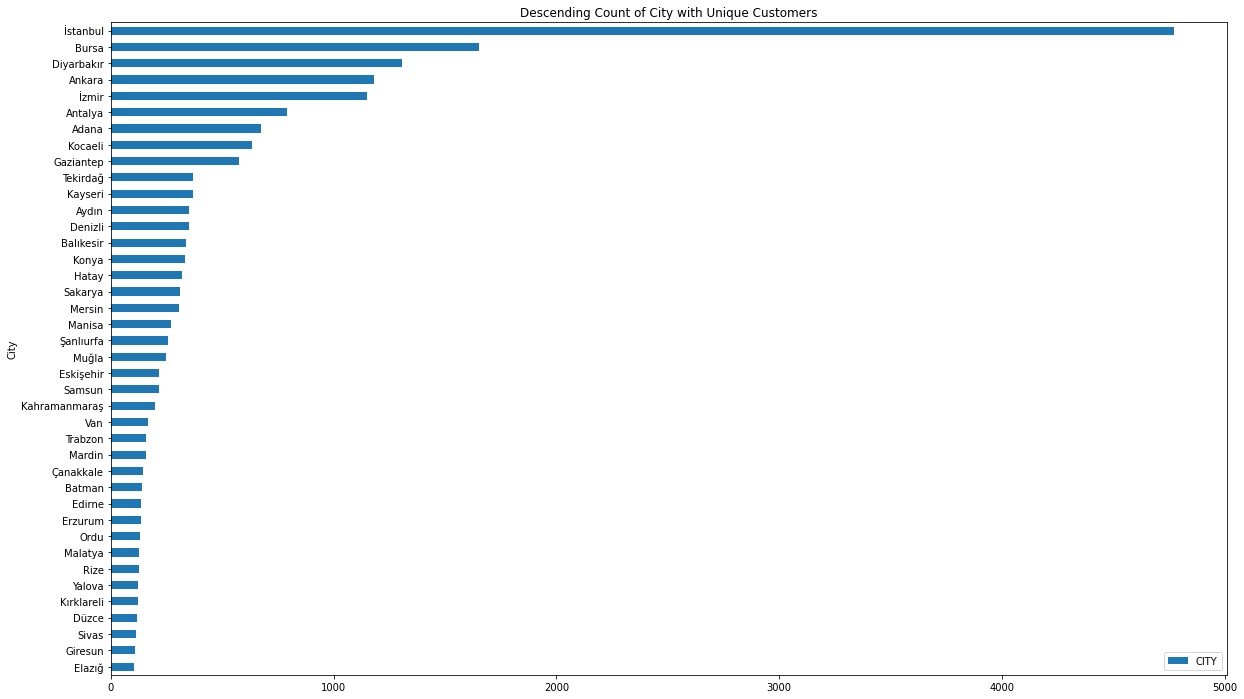

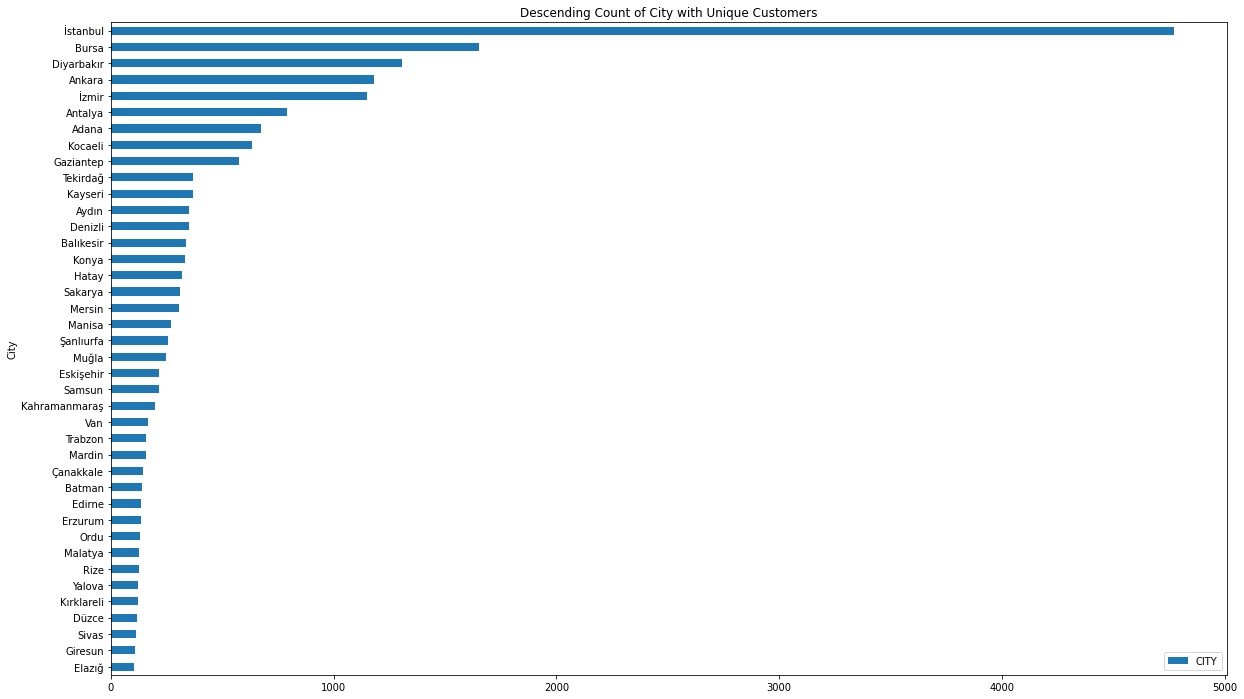

In [ ]:
#plotting the graph with descending count of city with unique customers
df['CITY'].value_counts()[:40].sort_values(ascending=True).plot(kind='barh',figsize=(20, 12),legend='CITY',title='Descending Count of City with Unique Customers',xlabel='City',ylabel='Count')



---

8. Plot the conversion for each month of the data (Conversion % = No. of unique
First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

In [ ]:
#extracting the month of registered date
df['REG_MONTH']=pd.to_datetime(df['REGISTRATION_DATE']).dt.month
#extracting the month of deposit date
df['DEP_MONTH']=pd.to_datetime(df['DEPOSIT_DATE']).dt.month
##extracting the yearof deposit date
df['DEP_YEAR']=pd.to_datetime(df['DEPOSIT_DATE']).dt.year
#extracting year month of deposit date
df['DEP_YEAR_MONTH']=df['DEPOSIT_DATE'].dt.to_period('M')
#extracting year month of registration date
df['REG_YEAR_MONTH']=df['REGISTRATION_DATE'].dt.to_period('M')

In [ ]:
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME,REG_MONTH,DEP_MONTH,DEP_YEAR,DEP_YEAR_MONTH,REG_YEAR_MONTH
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105,1,6,2022,2022-06,2009-01
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219,3,2,2022,2022-02,2009-03
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139,4,5,2022,2022-05,2009-04
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219,5,2,2022,2022-02,2009-05
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112,6,5,2022,2022-05,2009-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,CUSTOMER_LIFETIME,REG_MONTH,DEP_MONTH,DEP_YEAR,DEP_YEAR_MONTH,REG_YEAR_MONTH
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105,1,6,2022,2022-06,2009-01
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219,3,2,2022,2022-02,2009-03
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139,4,5,2022,2022-05,2009-04
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219,5,2,2022,2022-02,2009-05
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112,6,5,2022,2022-05,2009-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,18,8,8,2022,2022-08,2022-08


In [ ]:
res= df.groupby(['DEP_YEAR_MONTH'])['IDCUSTOMER'].count() #checking the values of deposit date
res

DEP_YEAR_MONTH
2022-01    2555
2022-02    3202
2022-03    3790
2022-04    3386
2022-05    2983
2022-06    1839
2022-07    1842
2022-08    2468
Freq: M, Name: IDCUSTOMER, dtype: int64

DEP_YEAR_MONTH
2022-01    2555
2022-02    3202
2022-03    3790
2022-04    3386
2022-05    2983
2022-06    1839
2022-07    1842
2022-08    2468
Freq: M, Name: IDCUSTOMER, dtype: int64

*can observe that the deposit values are from 2022*

In [ ]:
df4=df.loc['2022-01-01': '2022-12-31']  #since deposit date is starting from 2022

In [ ]:
df4['DEP_MONTH_COUNT']= df.groupby(['DEP_YEAR_MONTH'])['IDCUSTOMER'].count()
df4['REG_MONTH_COUNT']= df.groupby(['REG_YEAR_MONTH'])['IDCUSTOMER'].count()
df4['CONVERSION']=df4['DEP_MONTH_COUNT']/df4['REG_MONTH_COUNT']
df4.drop(['IDCUSTOMER','GENDER','CITY','COUNTRY','FIRST_DEPOSIT_AMOUNT','REGISTRATION_DATE','DEPOSIT_DATE','DEP_YEAR_MONTH','REG_YEAR_MONTH','CUSTOMER_LIFETIME','REG_MONTH','DEP_MONTH','DEP_YEAR'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,DEP_MONTH_COUNT,REG_MONTH_COUNT,CONVERSION
DEP_YEAR_MONTH,,,
2022-01,2555,2420,1.055785
2022-02,3202,2924,1.095075
2022-03,3790,3350,1.131343
2022-04,3386,2921,1.159192
2022-05,2983,2607,1.144227
2022-06,1839,1682,1.093341
2022-07,1842,1840,1.001087
2022-08,2468,2361,1.045320


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,DEP_MONTH_COUNT,REG_MONTH_COUNT,CONVERSION
DEP_YEAR_MONTH,,,
2022-01,2555,2420,1.055785
2022-02,3202,2924,1.095075
2022-03,3790,3350,1.131343
2022-04,3386,2921,1.159192
2022-05,2983,2607,1.144227
2022-06,1839,1682,1.093341
2022-07,1842,1840,1.001087
2022-08,2468,2361,1.045320


Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

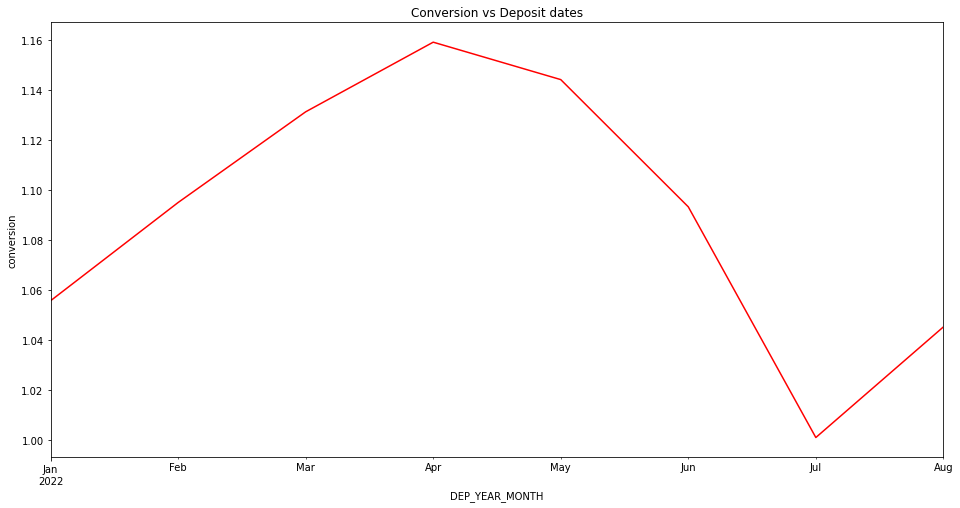

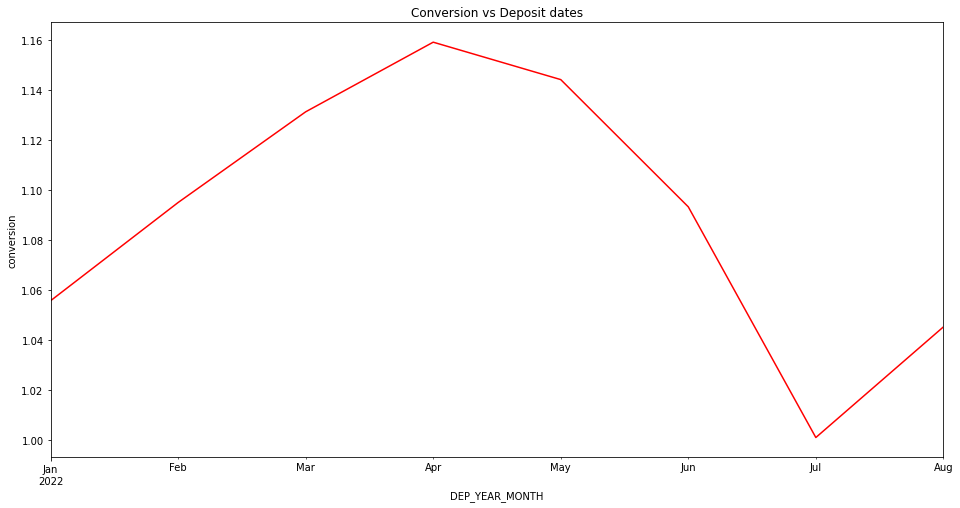

In [ ]:
df4['CONVERSION'].plot(figsize=(16, 8), color='r',ylabel='conversion',title='Conversion vs Deposit dates')

9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [ ]:
df4[df4.index =='2022-06']["CONVERSION"].round(2)

DEP_YEAR_MONTH
2022-06    1.09
Freq: M, Name: CONVERSION, dtype: float64

DEP_YEAR_MONTH
2022-06    1.09
Freq: M, Name: CONVERSION, dtype: float64



---



---


10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:

 1.week of day column from the deposit date column


 2.descriptive statistics of the table

 3.make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

In [ ]:
#Original dataset
df=pd.read_csv('/content/drive/MyDrive/assignment_python.csv')
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])

In [ ]:
df_ft=df.copy()

In [ ]:
#extracting the weeknumber from the deposit date
df_ft['weekNumber']= df['DEPOSIT_DATE'].dt.week
df_ft


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,weekNumber
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,35
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,35
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,35
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,weekNumber
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21
...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,35
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,35
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,35
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,35


In [ ]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IDCUSTOMER            22065 non-null  int64         
 1   GENDER                22065 non-null  object        
 2   CITY                  22065 non-null  object        
 3   COUNTRY               22065 non-null  object        
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64       
 5   REGISTRATION_DATE     22065 non-null  datetime64[ns]
 6   DEPOSIT_DATE          22065 non-null  datetime64[ns]
 7   weekNumber            22065 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID

In [ ]:
#descriptive statistics
df_ft['FIRST_DEPOSIT_AMOUNT'].describe()

count     22065.000000
mean        284.806530
std         943.993064
min           0.380000
25%          70.000000
50%         100.000000
75%         250.000000
max      100000.000000
Name: FIRST_DEPOSIT_AMOUNT, dtype: float64

count     22065.000000
mean        284.806530
std         943.993064
min           0.380000
25%          70.000000
50%         100.000000
75%         250.000000
max      100000.000000
Name: FIRST_DEPOSIT_AMOUNT, dtype: float64

In [ ]:
#Adding the binned column
bins = np.arange(0,max(df['FIRST_DEPOSIT_AMOUNT']) ,500)
df_ft['binned'] = pd.cut(df['FIRST_DEPOSIT_AMOUNT'], bins)
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,weekNumber,binned
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22,"(0.0, 500.0]"
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6,"(0.0, 500.0]"
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18,"(0.0, 500.0]"
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6,"(0.0, 500.0]"
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21,"(500.0, 1000.0]"
...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"


,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,weekNumber,binned
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22,"(0.0, 500.0]"
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6,"(0.0, 500.0]"
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18,"(0.0, 500.0]"
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6,"(0.0, 500.0]"
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21,"(500.0, 1000.0]"
...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,35,"(0.0, 500.0]"


11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

In [ ]:
df_ft1=pd.DataFrame()
df_ft1['REG_COUNT']= df_ft.groupby(['REGISTRATION_DATE'])['IDCUSTOMER'].count()
df_ft1

,REG_COUNT
REGISTRATION_DATE,
2009-01-10,1
2009-03-01,1
2009-04-06,1
2009-05-02,1
2009-06-07,1
...,...
2022-08-27,67
2022-08-28,83
2022-08-29,55


,REG_COUNT
REGISTRATION_DATE,
2009-01-10,1
2009-03-01,1
2009-04-06,1
2009-05-02,1
2009-06-07,1
...,...
2022-08-27,67
2022-08-28,83
2022-08-29,55


In [ ]:
df_ft2=df_ft1.loc['2022-01-01': '2022-12-31'] #considering the deposit data is present from 2022.

In [ ]:
df_ft2['MA7'] = df_ft2['REG_COUNT'].rolling(7).mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


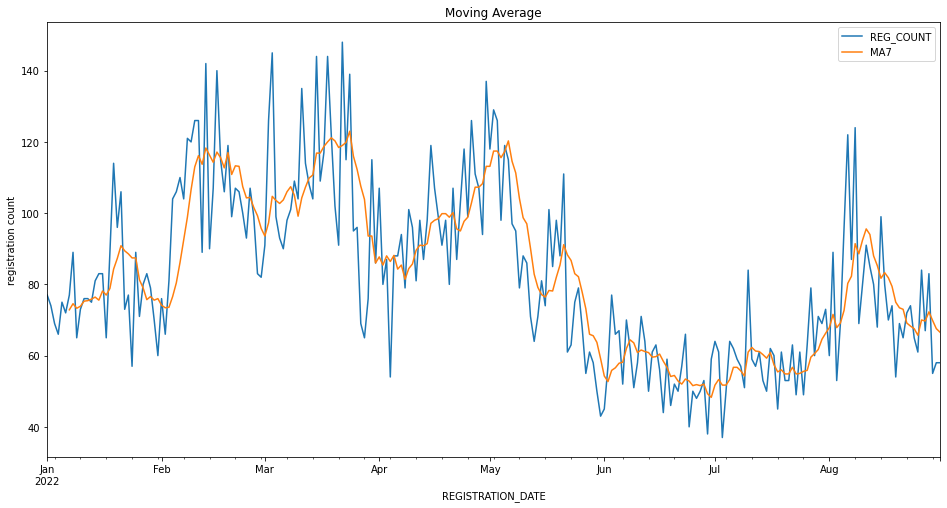

In [ ]:
df_ft2[['REG_COUNT', 'MA7']].plot(figsize=(16, 8),title='Moving Average',ylabel='registration count')